<a href="https://colab.research.google.com/github/ampnb/Mind/blob/main/MW_FirstExperiment_TanV2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install mne numpy scipy matplotlib

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.6/7.6 MB 62.3 MB/s eta 0:00:00


In [2]:
import mne

meditation_file = '/content/tan_meditation_trial1.fif'
mind_wandering_file = '/content/tan_mindwandering_trial1.fif'

meditation_raw = mne.io.read_raw_fif(meditation_file, preload=True)
mind_wandering_raw = mne.io.read_raw_fif(mind_wandering_file, preload=True)

Opening raw data file /content/tan_meditation_trial1.fif...
    Range : 0 ... 86316 =      0.000 ...   345.264 secs
Ready.


<ipython-input-2-9a6918c56e7c>:6: RuntimeWarning: This filename (/content/tan_meditation_trial1.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  meditation_raw = mne.io.read_raw_fif(meditation_file, preload=True)


Reading 0 ... 86316  =      0.000 ...   345.264 secs...
Opening raw data file /content/tan_mindwandering_trial1.fif...
    Range : 0 ... 84308 =      0.000 ...   337.232 secs
Ready.
Reading 0 ... 84308  =      0.000 ...   337.232 secs...


<ipython-input-2-9a6918c56e7c>:7: RuntimeWarning: This filename (/content/tan_mindwandering_trial1.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  mind_wandering_raw = mne.io.read_raw_fif(mind_wandering_file, preload=True)


In [3]:
import numpy as np
import matplotlib.pyplot as plt
from mne.stats import permutation_cluster_test


In [4]:
meditation_raw_filtered = meditation_raw.filter(1, 30)
mind_wandering_raw_filtered = mind_wandering_raw.filter(1, 30)


Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 1 - 30 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Upper passband edge: 30.00 Hz
- Upper transition bandwidth: 7.50 Hz (-6 dB cutoff frequency: 33.75 Hz)
- Filter length: 825 samples (3.300 sec)

Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 1 - 30 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Upper passband edge: 

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   8 out of   8 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   8 out of   8 | elapsed:    0.0s finished


In [5]:
tmin, tmax = 0, 60  # Define the time range for epochs (1-minute epochs)
n_epochs = 5  # Number of epochs for each condition


In [6]:
import numpy as np

def create_epochs(raw_data, tmin, tmax, n_epochs):
    sfreq = raw_data.info['sfreq']
    events = np.zeros((n_epochs, 3), dtype=int)
    events[:, 0] = np.arange(0, n_epochs) * sfreq * (tmax - tmin)
    events[:, 2] = 1
    return mne.Epochs(raw_data, events, tmin=tmin, tmax=tmax, baseline=None, preload=True)

meditation_epochs = create_epochs(meditation_raw_filtered, tmin, tmax, n_epochs)
mind_wandering_epochs = create_epochs(mind_wandering_raw_filtered, tmin, tmax, n_epochs)


Not setting metadata
5 matching events found
No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 5 events and 15001 original time points ...
0 bad epochs dropped
Not setting metadata
5 matching events found
No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 5 events and 15001 original time points ...
0 bad epochs dropped


In [12]:
import numpy as np
import matplotlib.pyplot as plt
from mne.stats import permutation_cluster_test

In [14]:
def compute_t_stat(data1, data2):
    return np.mean(data1 - data2, axis=0) / (np.std(data1 - data2, axis=0) / np.sqrt(len(data1)))


In [15]:
meditation_data = meditation_epochs.get_data()
mind_wandering_data = mind_wandering_epochs.get_data()


In [16]:
threshold = 2.0  # Choose a threshold for the initial clustering
n_permutations = 1000  # Choose the number of permutations

T_obs, clusters, cluster_p_values, H0 = permutation_cluster_test(
    [meditation_data, mind_wandering_data],
    n_permutations=n_permutations,
    threshold=threshold,
    tail=0,  # Two-tailed test
    stat_fun=compute_t_stat,
    n_jobs=1,
)


stat_fun(H1): min=-22.967356 max=29.718590
Running initial clustering …
Found 2084 clusters


  0%|          | Permuting : 0/999 [00:00<?,       ?it/s]

In [18]:
difference_evoked = mne.combine_evoked([meditation_evoked, mind_wandering_evoked], weights=[1, -1])


In [19]:
from mne.stats import permutation_cluster_test

# Convert the epochs data to an array of shape (n_epochs, n_channels, n_times)
meditation_epochs_data = meditation_epochs.get_data()
mind_wandering_epochs_data = mind_wandering_epochs.get_data()

# Combine the data from both conditions into a single array
combined_epochs_data = [meditation_epochs_data, mind_wandering_epochs_data]

# Set the threshold for the clusters (e.g., 2.5 standard deviations away from the mean)
threshold = 2.5

# Perform the cluster-based permutation test
T_obs, clusters, cluster_p_values, H0 = permutation_cluster_test(
    combined_epochs_data, n_permutations=1000, threshold=threshold, tail=0, n_jobs=1
)


stat_fun(H1): min=0.000000 max=73.160206
Running initial clustering …
Found 1842 clusters


  0%|          | Permuting : 0/999 [00:00<?,       ?it/s]

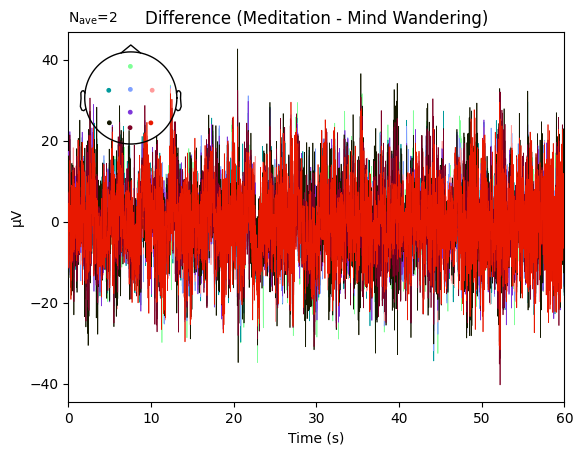

In [21]:
# Plot the evoked responses and highlight the significant clusters
fig, ax = plt.subplots()
difference_evoked.plot(axes=ax, show=False, time_unit='s')
ax.set_title('Difference (Meditation - Mind Wandering)')

for cluster_idx in significant_clusters:
    ax.fill_between(
        times,
        difference_evoked.data.min(),
        difference_evoked.data.max(),
        where=significant_masks[cluster_idx],
        color='red',
        alpha=0.3
    )

plt.show()



    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows


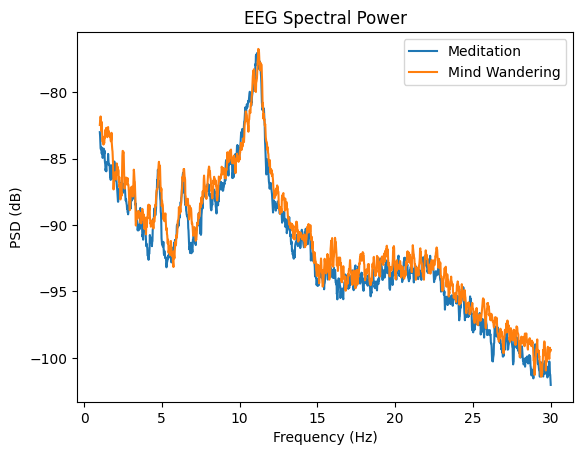

In [25]:
import numpy as np

# Compute the PSD for both conditions
meditation_psd, meditation_freqs = mne.time_frequency.psd_array_multitaper(meditation_epochs.get_data(), sfreq=meditation_epochs.info['sfreq'], fmin=1, fmax=30)
mind_wandering_psd, mind_wandering_freqs = mne.time_frequency.psd_array_multitaper(mind_wandering_epochs.get_data(), sfreq=mind_wandering_epochs.info['sfreq'], fmin=1, fmax=30)

# Calculate the mean PSD across all epochs for each condition
meditation_psd_mean = np.mean(meditation_psd, axis=1)
mind_wandering_psd_mean = np.mean(mind_wandering_psd, axis=1)

# Calculate the grand average PSD across all channels
meditation_psd_grand_mean = np.mean(meditation_psd_mean, axis=0)
mind_wandering_psd_grand_mean = np.mean(mind_wandering_psd_mean, axis=0)

# Plot the grand average PSD for both conditions
fig, ax = plt.subplots()
ax.plot(meditation_freqs, 10 * np.log10(meditation_psd_grand_mean), label='Meditation')
ax.plot(mind_wandering_freqs, 10 * np.log10(mind_wandering_psd_grand_mean), label='Mind Wandering')

ax.set_xlabel('Frequency (Hz)')
ax.set_ylabel('PSD (dB)')
ax.set_title('EEG Spectral Power')
ax.legend()

plt.show()



